# Lesson I 

## Importing Flat Files From the Web

We are now able to import data in Python from all sorts of file types:

* Flat files: .txt, .csv
* Pickled files, Excel Spreadsheets, and many others!
* Data from relational databases

However, all of these skill involve importing data from files that you have locally. What if your data is online?

We can use our browser and navigate the relevant URL, and download the file but this poses a few problems:
* It isn't written in code and so posses reproducibility
* It is **NOT** scalable.

### We'll learn how to...

* Import and locally save datasets from the web
* Load datasets into pandas DataFrames
* Make HTTP requests (GET requests)
* Scrape web data such as HTML
* Parse HTML into useful data (BeautifulSoup)
* Use the urllib and requests packages

We'll first check out urllib:

### The urllib package

This module provides a high-level interface for fetching data across the World Wide Web, in particular, the ```urlopen()``` function is similiar to the built-in function ```open()```, but accepts Universal Resource Locators(URLs) instead of filenames.

#### How to automate file download in Python

```python
from urllib.request import urlretrieve
url = 'htttp://SOME--URL--.com'
urlretrieve(url, 'winequality_white.csv')
```



# Exercise Importing flat files from the web

You are about to import your first file from the web! The flat file you will import will be ```'winequality-red.csv'``` from the University of California, Irvine's [Machine Learning repository](https://archive.ics.uci.edu/ml/index.php). The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is:

``` 
'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```

In [3]:
# Import package
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file : url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'datasets/winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Opening and reading flat files from the web

You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using ```pandas```. In particular, you can use the function ```pd.read_csv()``` with the URL as the first argument and the separator ```sep``` as the second argument.

The URL of the file, once again, is:

```
'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
```

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

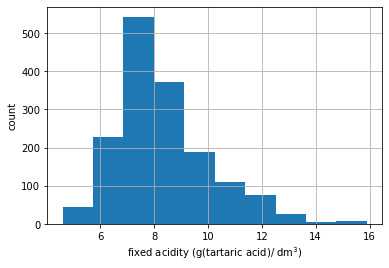

In [5]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file : url
url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/ dm$^3$)')
plt.ylabel('count')
plt.show()

## Importing non-flat files from the web

Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the ```pandas``` function ```pd.read_csv()```. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. In this interactive exercise, you'll use ```pd.read_excel()``` to import an Excel spreadsheet.

The URL of the spreadsheet is :

```
'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'
```

Your job is to use ```pd.read_excel()``` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of ```pd.read_excel()``` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [6]:
# Import package
import pandas as pd

# Assign url of file: url
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xls
xls = pd.read_excel(url, sheet_name=None)

# Print the sheetnames to the shell
print(xls.keys())

# Print the head of the first sheet (using its name, Not its index)
print(xls['1700'].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


# Lesson II

## HTTP requests to import files from the web

### URL

* URL Stands for Uniform or Universal Resource Locator
* References to websources
* URLs can refer to a few other things, but we will focus on web addresses
* Locations of websites consists of 2 parts:
    - Protocol identifier - http:
    - Resource name - datacamp.com

### HTTP

* HTTP stands for HyperText Transfer Protocol
* Foundation of data communication for the web
* HTTPS - more secure form of HTTP
* When we go to a website, we are actually sending HTTP request to a server
    - Which is know by GET request
* We are performing a GET request when using the function ```urlretrieve()```.
* We will also figure out how to get HTML(HyperText Markup Language) from a webpage.

### GET requests using urllib

```python
from urllib.request import urlopen, Request
url = 'https://www.wikipedia.org/'
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()
```

### GET requests using requests

```python
import requests
url = 'https://www.wikipedia.org/'
r = requests.get(url)
text = r.text
```

## Exercise

### Performing HTTP requests in Python using urllib

Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from the first coding exercise of this course,

```
"https://campus.datacamp.com/courses/1606/4135?ex=2"
```

In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

In [7]:
# Import packages
from urllib.request import urlopen, Request

# Specify the URL
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request : request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Close the response
response.close()

<class 'http.client.HTTPResponse'>


### Printing HTTP requests results in Python using urllib

You have just packaged and sent a **GET** request to: 
```
"https://campus.datacamp.com/courses/1606/4135?ex=2" 
```
and then caught the response. You saw that such a response is a ```http.client.HTTPResponse``` *object*. The question remains: what can you do with this response?

Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a ```http.client.HTTPResponse``` object has an associated ```read()``` method. In this exercise, you'll build on your previous great work to extract the response and print the HTML.


In [ ]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# this packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the respone : html
html = response.read()

# print the html
print(html)

# Close the response
response.close()

### Performing HTTP requests in Python using requests

Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their :
```
"http://www.datacamp.com/teach/documentation" 
```
page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!


In [ ]:
# Import package
import requests

# Specify the url : url
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
print(text)

# Lesson III

## Scraping the web in Python

### HTML

* HTML is a mix of unstructured and structured data

* **Structured Data**:
    - Has pre-defined data model, or
    - Organized in a defined manner
* **Unstructured Data**:
    - Has neither of these properties

HTML is interesting because, although much of it is unstructured text, it does contain tags that determine where, headings can be found, or hyperlinks.

### BeatifulSoup

To turn HTML that we have scraped from the web into useful data, we'll need to parse it and extract structured data from it.

<img src='pictures/bs4.jpg' />

In web development, the term *"tag soup"* refers to structurally or syntactically incorrect HTML code written for a web page. What does Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease!

```python
from bs4 import BeautifulSoup
import requests

url='https://www.crummy.com/software/BeautifulSoup/'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
```

```python
print(soup.prettify())
```

Output will be indented in the way we would expect properly written HTML to be

#### Exploring BeautifulSoup

* Many Methods such as :
    - ```print(soup.title)```
    - ```print(soup.get_text())```

* ```find_all()```
    ```python
    for link in soup.find_all('a'):
        print(link.get('href'))
    ```    
    - Will find all the links in HTML file
    

## Exercise

### Parsing HTML with BeautifulSoup

In this interactive exercise, you'll learn how to use the BeautifulSoup package to *parse*, *prettify* and *extract* information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own [Benevolent Dictator for Life](https://en.wikipedia.org/wiki/Benevolent_dictator_for_life). In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is:

```python
url = 'https://www.python.org/~guido/'
```

In [11]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="images/df20000406.jpg">
    Who I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Public

### Turning a webpage into data using BeautifulSoup: getting the text

As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [12]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guio's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

My Name
My name often poses difficulties for Americans.

Pronunciation: in Dutch, the "G" in Guido is a hard G,
pronounced roughly like the "ch" in Scottish "l

### Turning a webpage into data using BeautifulSoup: getting the hyperlinks

In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method ```find_all()```.

In [13]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

# Print the title of Guido's webpage
print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

<title>Guido's Personal Home Page</title>
pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif
